<a href="https://colab.research.google.com/github/vaishnavi2460/jupyternotebook/blob/main/sparktask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAME: V.VAISHNAVI**

**TASK TWO**: IRIS DATASET.
To classify different types of iris flowers using unsupervised machine learning.

**ALGORITHM USED**: K means clustering

Iris Dataset is used for the classification task in machine learning. Iris dataset consists of four columns containing sepal length, sepal width, petal length, petal width of three categories of flower named Satosa Versicolour and verginica. Our task in this project is to classify the three categories of flowers on the basis of length and width of sepal and petal.

In [ ]:
#importing the suitable libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
sns.set_palette('husl')

In [ ]:
df= pd.read_csv("/content/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# **DATA ANALYSIS**

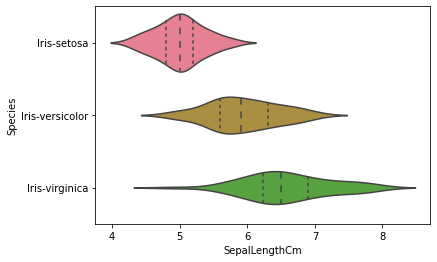

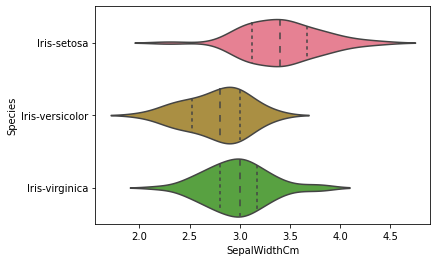

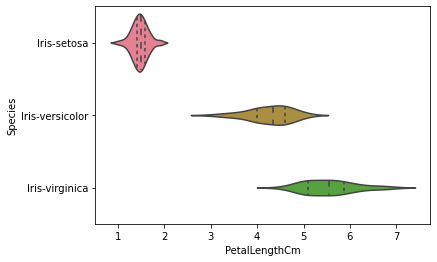

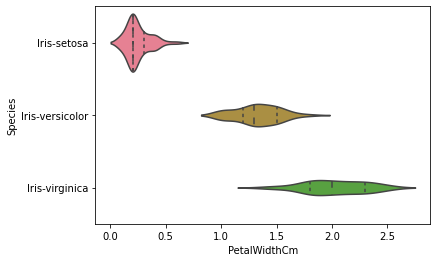

In [ ]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

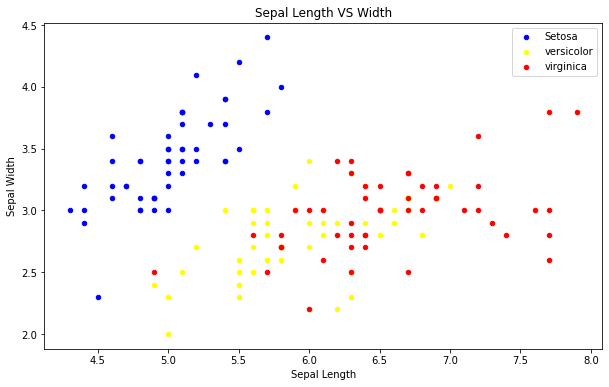

In [ ]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='yellow', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

###OBSERVATION###
###1.setosa is somewhat linearly seperable
###2.but the yellow and red points are not easily seperated.

####we need to try different combinations. so we represent all the combinations using pair plots.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


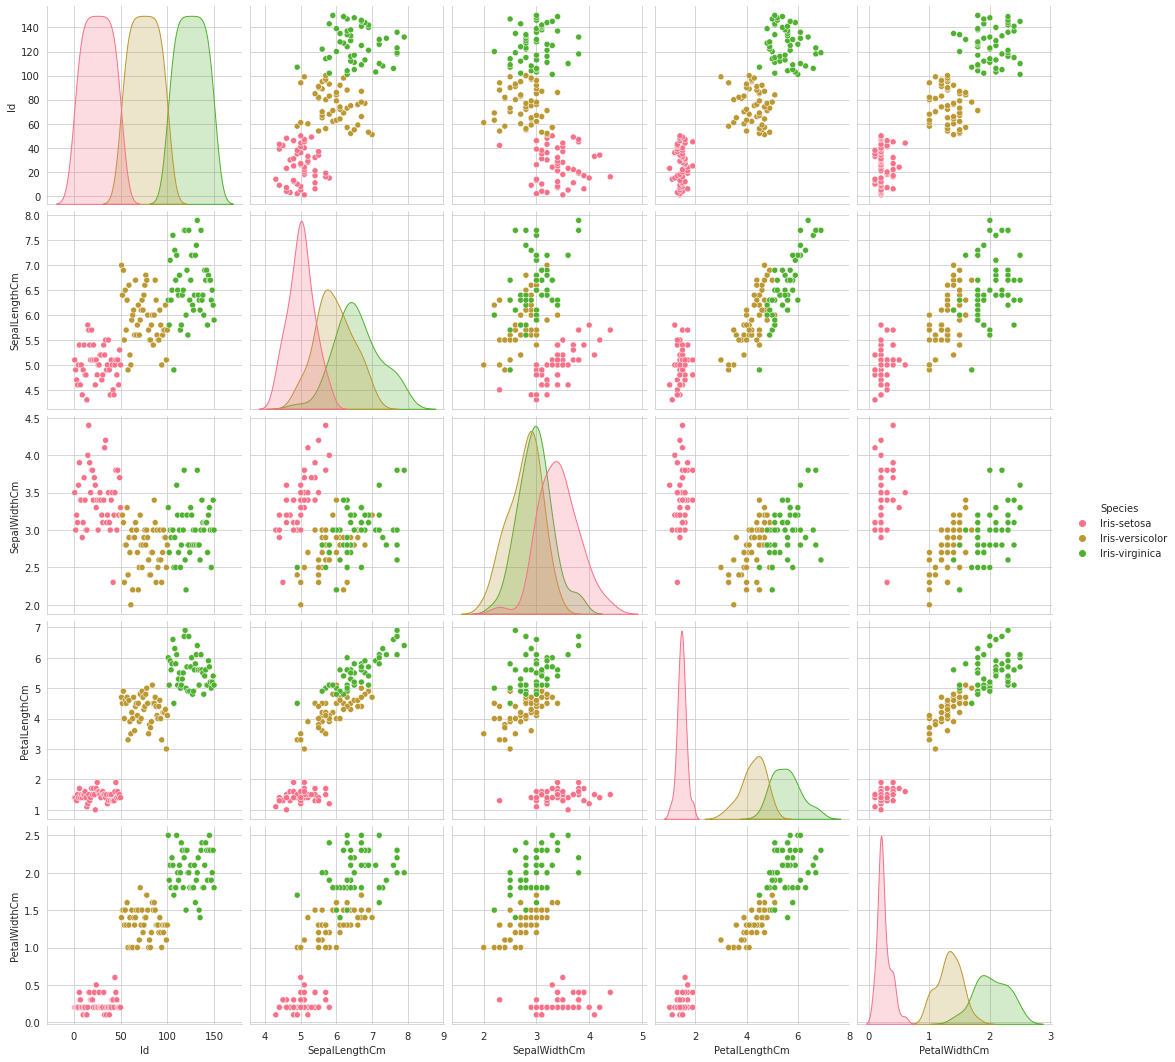

In [ ]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df,hue="Species",size=3);
plt.show()

###observation:
###1.the plot between petal length and petal width is much more seperable and clearer

# **K MEANS CLUSTERING**
## this clustering can be done by following the steps give below::

step 1:select the no.of clusters u wanna identify in your data. in this case we are gonna use 3 clusters for 3 iris types. therefore K=3.

step2: randomly select 3 distinct datapoints. those points are initial clusters

step 3:measure the distance between first point and the 3 initial clusters assingn the first point to the nearest initial cluster

step 4:continue step 3 for the remaining points and we will get 3 different clusters

step 5:calculate the mean of each cluster

In [ ]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
df.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary


In [ ]:
df1 = pd.DataFrame({
    'x': df["PetalLengthCm"],
    'y': df['PetalWidthCm'],
})
df1

,x,y
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
df.loc[df['Species']=='Iris-setosa', 'cluster'] = '0' 
df.loc[df['Species']=='Iris-versicolor', 'cluster'] = '1' 
df.loc[df['Species']=='Iris-virginica', 'cluster'] = '2' 

In [ ]:
df1["cluster"]=df['cluster']
df1

,x,y,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Kmean.cluster_centers_


array([[1.464     , 0.244     , 0.        ],
       [5.57346939, 2.03265306, 2.        ],
       [4.26470588, 1.33333333, 1.01960784]])

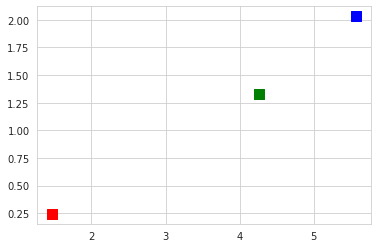

In [ ]:
plt.scatter(5.57346939,2.03265306 , s=100, c='blue', marker='s')
plt.scatter(1.464,0.244 , s=100, c='red', marker='s')
plt.scatter(4.26470588,1.33333333, s=100, c='green', marker='s')
plt.show()

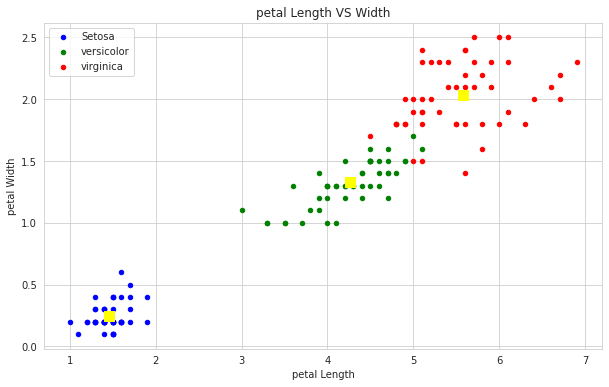

In [ ]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='red', label='virginica', ax=fig)
fig.set_xlabel("petal Length")
fig.set_ylabel("petal Width")
fig.set_title("petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.scatter(5.57346939,2.03265306 , s=100, c='yellow', marker='s')
plt.scatter(1.464,0.244 , s=100, c='yellow', marker='s')
plt.scatter(4.26470588,1.33333333, s=100, c='yellow', marker='s')
plt.show()